In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

Entrenamiento SGD completado
Score del conjunto de entrenamiento: -0.834
Score del conjunto de prueba: -0.561
Se obtienen los siguientes coeficientes de determinación:
[-7.993, -7.82, -2.932, -5.552, -6.86] 

Max R-Squared: -2.932
Min R-Squared: -7.993
Promedio R-Squared: -6.231
Desviación Estándar: 1.864
Intervalo de confianza 95%: [-7.9757 -3.194 ]


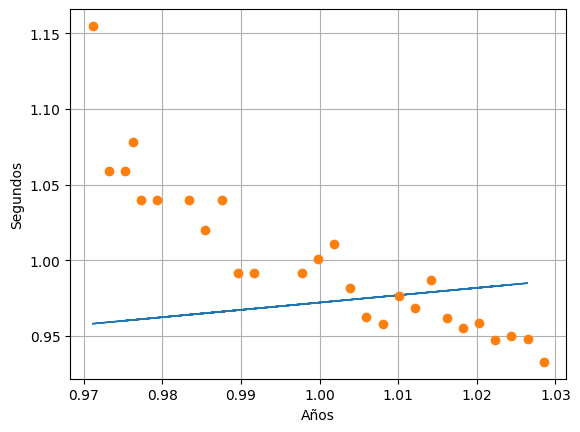

In [ ]:
def size():
  Documento = open('/content/drive/MyDrive/olympic100m_men.txt','r')
  a = sum(1 for line in Documento)
  Documento.close()
  return a

filas = size()
f = open('/content/drive/MyDrive/olympic100m_men.txt','r')
data = np.zeros([filas,2])
counter = 0
grado_mas_1 = 6
for line in f:
  data[counter] = line.split(',')
  counter = counter + 1
f.close()

X = (data[:,0] / data[:,0].mean()).reshape(-1,1)
y = data[:,1] / data[:,1].mean()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)

def train_model(x_tr, y_tr, x_tst, y_tst):
    try:
        reg = SGDRegressor(max_iter=100000, tol=1e-4)
        reg.fit(x_tr, y_tr)
    except Exception as e:
        msg = f'Error durante el entrenamiento: {e}'
        raise Exception(msg) from e
    else:
        train_score = reg.score(x_tr, y_tr)
        test_score = reg.score(x_tst, y_tst)
        print('Entrenamiento SGD completado')
        print('Score del conjunto de entrenamiento: {:.3f}'.format(train_score))
        print('Score del conjunto de prueba: {:.3f}'.format(test_score))
        y_pred = reg.predict(x_tst)
        return y_pred

def evaluate_regression_model(X_var, y_var):
    try:
        kf = KFold(n_splits=5, shuffle=True, random_state=68)
        reg = SGDRegressor(max_iter=1000, tol=1e-3)
        cv_scores = cross_val_score(reg, X_train, y_train, cv=kf)
        if cv_scores is not None:
            cv_scores = [round(num, 3) for num in cv_scores]
            print('Se obtienen los siguientes coeficientes de determinación:')
            print(cv_scores, '\n')
            print(f'Max R-Squared: {max(cv_scores)}')
            print(f'Min R-Squared: {min(cv_scores)}')
            print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
            print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
            print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}')
    except Exception as e:
        print(e)


y_pred = train_model(X_train, y_train, X_test, y_test)
evaluate_regression_model(X, y)

plt.plot(X_test, y_pred, linewidth=1.1)
plt.plot(X, y, "o")
plt.grid()
plt.xlabel('Años')
plt.ylabel('Segundos')
plt.show()